In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [2]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

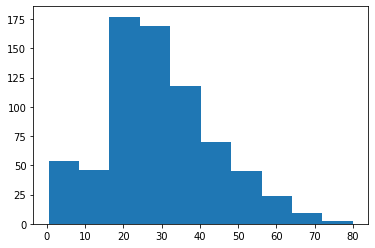

In [4]:
import matplotlib.pyplot as plt
plt.hist(titanic['Age'])

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

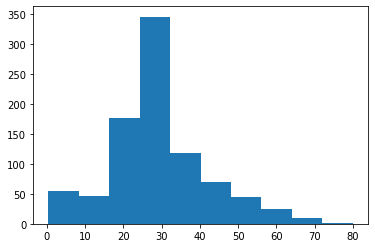

In [5]:
titanic.fillna(titanic['Age'].mean(), inplace=True)
plt.hist(titanic['Age'])

In [6]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
titanic.replace({'Sex':{'male':0, 'female':1}}, inplace=True)
titanic['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [8]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

In [9]:
titanic.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], inplace=True)


In [10]:
X = titanic[['Pclass', 'Sex', 'Age', 'FamilySize']]
y = titanic[['Survived']]

In [11]:
titanic.head()

,Survived,Pclass,Sex,Age,FamilySize
0,0,3,0,22.0,2
1,1,1,1,38.0,2
2,1,3,1,26.0,1
3,1,1,1,35.0,2
4,0,3,0,35.0,1


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

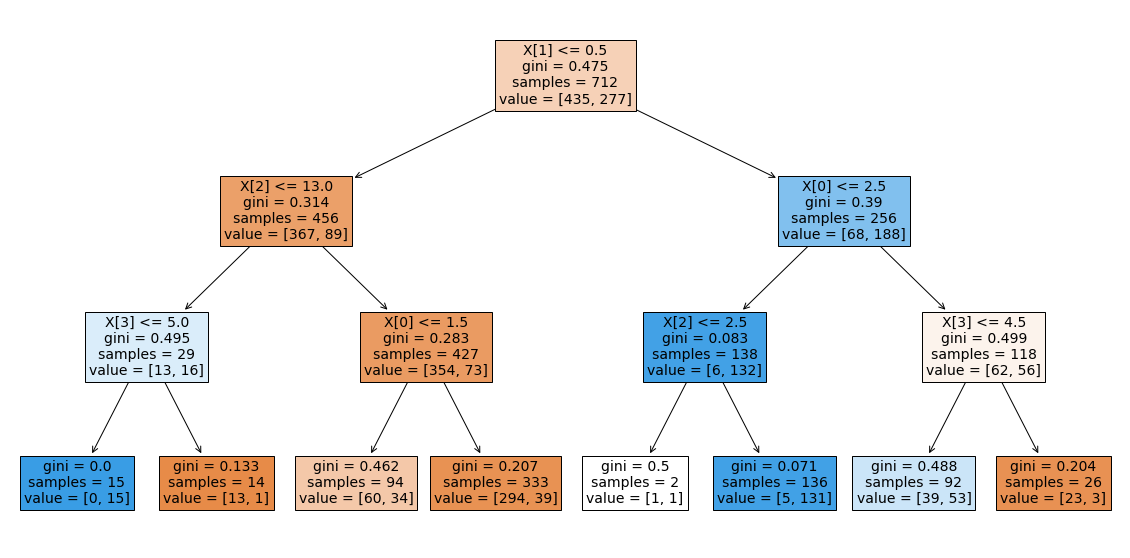

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=3, criterion='gini').fit(X_train, y_train)  # criterion = 'gini' or 'entropy'

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, fontsize=14)
plt.show()

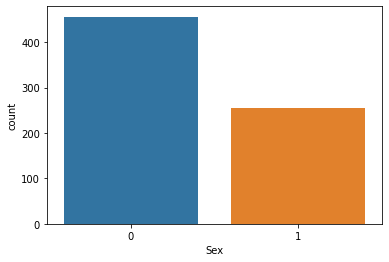

In [14]:
import seaborn as sns
sns.countplot(x='Sex', data=X_train)

In [15]:
def draw_grid(x_lim=np.array([-4, 4]), y_lim=np.array([-4, 4])):
    """Draw an empty grid"""
    ax = plt.gca()
    # Draw ticks and grid
    for i in range(int(x_lim.min()), int(x_lim.max())):
        ax.axvline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([i, i], [0.05, -0.05], color='#2c3e50')
    for i in range(int(y_lim.min()), int(y_lim.max())):
        ax.axhline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([0.05, -0.05], [i, i], color='#2c3e50')
    # x and y axis
    ax.axhline(0, color='#2c3e50', zorder=0)
    ax.axvline(0, color='#2c3e50', zorder=0)
    ax.scatter([0], [0], color='#c0392b', zorder=0)

    ax.grid(False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

def visualize_classifier(model, X, y, ax=None, cmap='viridis'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: The following kwargs were not used by contour: 'clim'


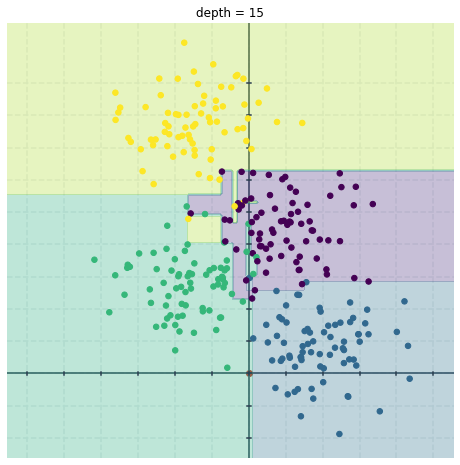

In [16]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

plt.figure(figsize=(8, 8))
draw_grid(x_lim=np.array([-6, 6]), y_lim=np.array([-2, 10]))

depth = 15
clf = DecisionTreeClassifier(max_depth=depth)
visualize_classifier(clf, X, y)
plt.title('depth = {0}'.format(depth))

plt.show()

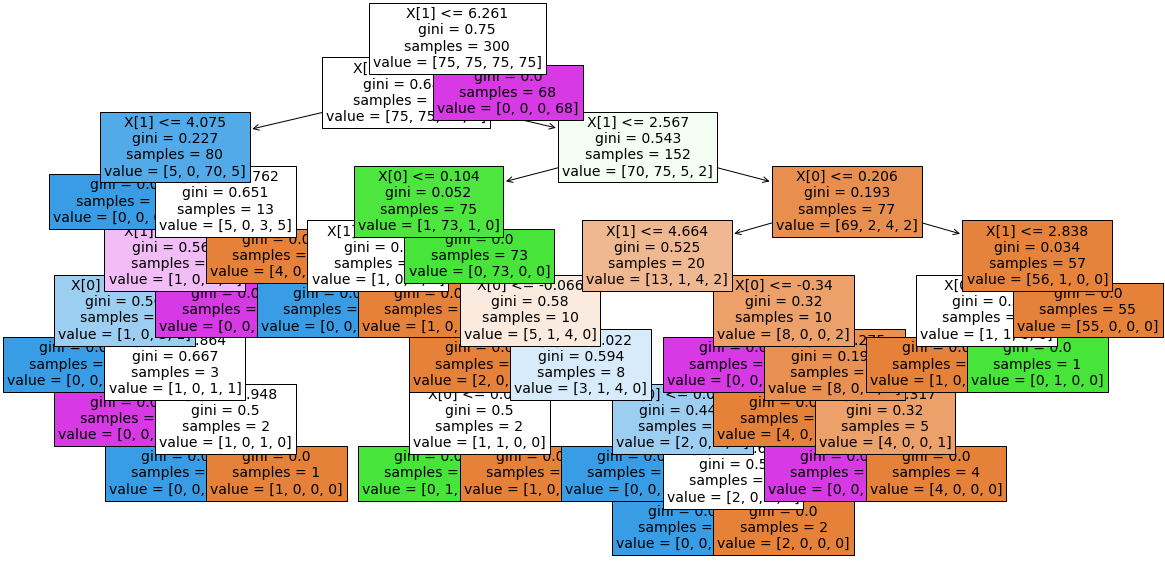

In [17]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, fontsize=14)
plt.show()

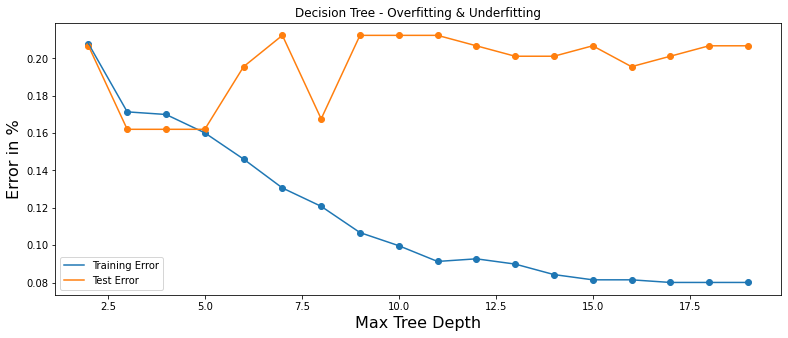

In [18]:
from sklearn.metrics import accuracy_score

max_depths = np.arange(2, 20)
train_errors = []
test_errors = []
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, criterion='gini').fit(X_train, y_train)
    train_errors.append(1 - accuracy_score(y_train, dt_clf.predict(X_train)))
    test_errors.append(1 - accuracy_score(y_test, dt_clf.predict(X_test)))

plt.figure(figsize=(13, 5))
plt.scatter(max_depths, train_errors)
plt.plot(max_depths, train_errors, label='Training Error')
plt.scatter(max_depths, test_errors)
plt.plot(max_depths, test_errors, label='Test Error')
plt.legend()
plt.title('Decision Tree - Overfitting & Underfitting')
plt.xlabel('Max Tree Depth', fontsize=16)
plt.ylabel('Error in %', fontsize=16)
plt.show()

In [19]:
from ipywidgets import interact

def plot_tree_interactive(X, y, max_depth=5):
    def interactive_tree(depth=max_depth):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        plt.figure(figsize=(8, 8))
        draw_grid(x_lim=np.array([-6, 6]), y_lim=np.array([-2, 10]))

        visualize_classifier(clf, X, y)

    return interact(interactive_tree, depth=range(1, max_depth+1))

plot_tree_interactive(X, y, 15)

interactive(children=(Dropdown(description='depth', index=14, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, …

<function __main__.plot_tree_interactive.<locals>.interactive_tree>

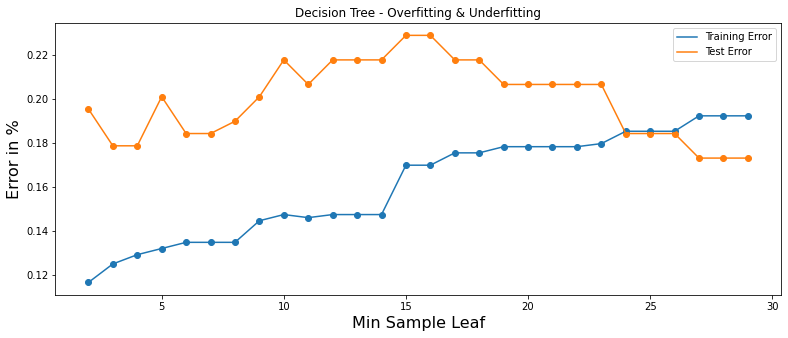

In [ ]:
from sklearn.metrics import accuracy_score

# min_leaf =  np.linspace(0.1, 0.5, 5, endpoint=True)
min_leaf = np.arange(2, 30)
train_errors = []
test_errors = []
for leaf in min_leaf:
    leaf_clf = DecisionTreeClassifier(min_samples_leaf= leaf , criterion='gini').fit(X_train, y_train)
    train_errors.append(1 - accuracy_score(y_train, leaf_clf.predict(X_train)))
    test_errors.append(1 - accuracy_score(y_test, leaf_clf.predict(X_test)))

plt.figure(figsize=(13, 5))
plt.scatter(min_leaf, train_errors)
plt.plot(min_leaf, train_errors, label='Training Error')
plt.scatter(min_leaf, test_errors)
plt.plot(min_leaf, test_errors, label='Test Error')
plt.legend()
plt.title('Decision Tree - Overfitting & Underfitting')
plt.xlabel('Min Sample Leaf', fontsize=16)
plt.ylabel('Error in %', fontsize=16)
plt.show()

In [ ]:
from ipywidgets import interact

def plot_tree_interactive(X, y, min_leaf):
    def interactive_tree(min_leaf=min_leaf):
        clf = DecisionTreeClassifier(min_samples_leaf= min_leaf, random_state=0)
        plt.figure(figsize=(8, 8))
        draw_grid(x_lim=np.array([-6, 6]), y_lim=np.array([0, 10]))

        visualize_classifier(clf, X, y)

    return interact(interactive_tree, min_leaf = np.arange(2, 30))

plot_tree_interactive(X, y, 25)

interactive(children=(Dropdown(description='min_leaf', index=23, options=(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, …

<function __main__.plot_tree_interactive.<locals>.interactive_tree>

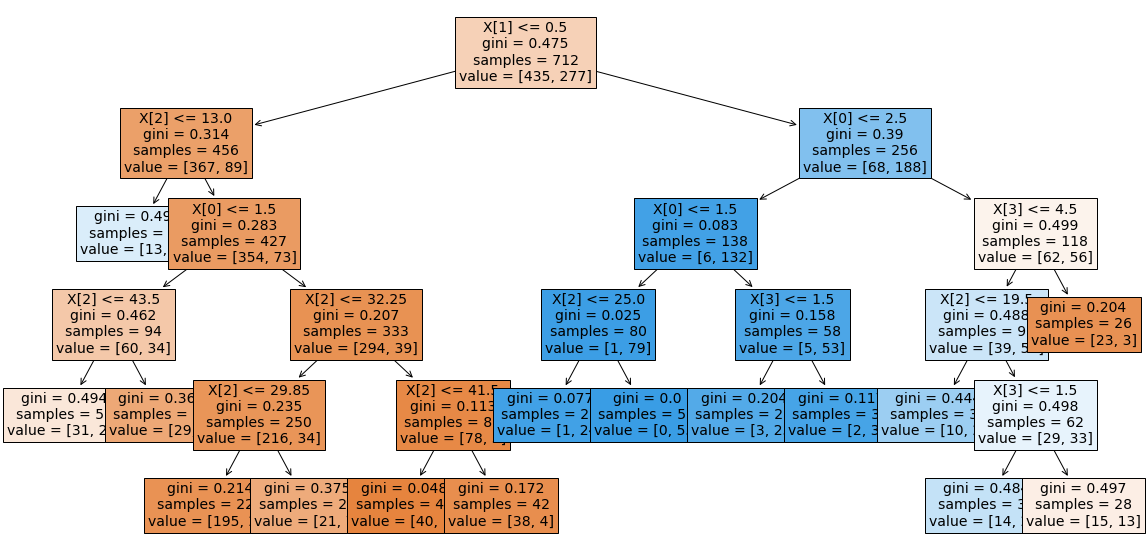

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf= 24, max_depth= 5 , criterion='gini').fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, fontsize=14)
plt.show()

In [ ]:
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test, clf.predict(X_test)))

0.8146067415730337
0.8156424581005587


[0.24866937 0.61281608 0.07965311 0.05886144]
Feature: 0, Score: 0.24867
Feature: 1, Score: 0.61282
Feature: 2, Score: 0.07965
Feature: 3, Score: 0.05886


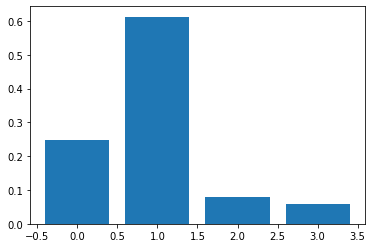

In [ ]:
importance = clf.feature_importances_
print(importance)
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
for feat, importance in zip(titanic.columns, clf.feature_importances_):
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

feature: Survived, importance: 0.24866937057940783
feature: Pclass, importance: 0.6128160819596071
feature: Sex, importance: 0.07965310545843676
feature: Age, importance: 0.05886144200254834
